This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

## Classifying newswires: A multiclass classification example

### The Reuters dataset

Você trabalhará com o conjunto de dados da Reuters, um conjunto de notícias curtas e seus tópicos, publicado por Reuters em 1986. É um conjunto de dados simples e amplamente usado para classificação de texto. São 46 tópicos diferentes; alguns tópicos são mais representados do que outros, mas cada tópico tem pelo menos 10 exemplos no conjunto de treinamento. Como o IMDB e o MNIST, o conjunto de dados da Reuters vem empacotado como parte do Keras. 

**Loading the Reuters dataset**

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [6]:
train_labels[10]

3

### Preparing the data

Assim como no exemplo anterior, é ncessária codificar o texto em formato de vetor. Essa codificação será a mesma utilizada no exemplo anterior (IMDB). A codificação one-hot é um formato amplamente usado para dados categóricos de codificação one-hot, também chamada de codificação categórica. Neste caso, a codificação one-hot dos rótulos consiste em incorporar cada rótulo como um vetor totalmente zero com 1 no lugar do índice do rótulo. 

**Encoding the input data**

In [7]:
#criando os tensores
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results


In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [9]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [10]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

Este problema de classificação de tópicos é semelhante ao problema anterior de classificação de resenhas de filmes: em ambos os casos, você está tentando classificar pequenos trechos de texto. Mas há uma nova restrição aqui: o número de classes de saída foi de 2 para 46. A dimensionalidade do espaço de saída é muito maior. 

Em uma sequência de camadas como a que você está usando, cada camada pode acessar apenas as informações Densas presentes na saída da camada anterior. Se uma camada descarta algumas informações relevantes para o problema de classificação, essas informações nunca podem ser recuperadas pelas camadas posteriores: cada camada pode potencialmente se tornar um gargalo de informações. No exemplo anterior, você usou camadas intermediárias de 16 dimensões, mas um espaço de 16 dimensões pode ser muito limitado para aprender a separar 46 classes diferentes: essas pequenas camadas podem atuar como gargalos de informações, descartando permanentemente informações relevantes. Por esse motivo, você usará camadas maiores de 64 unidades.

**Model definition**

In [11]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [12]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 67ms/step - loss: 2.5894 - accuracy: 0.5454 - val_loss: 1.7064 - val_accuracy: 0.6590
Epoch 2/20
16/16 [==============================] - 1s 50ms/step - loss: 1.4034 - accuracy: 0.7126 - val_loss: 1.3131 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 1s 49ms/step - loss: 1.0428 - accuracy: 0.7724 - val_loss: 1.1410 - val_accuracy: 0.7490
Epoch 4/20
16/16 [==============================] - 1s 49ms/step - loss: 0.8267 - accuracy: 0.8198 - val_loss: 1.0365 - val_accuracy: 0.7920
Epoch 5/20
16/16 [==============================] - 1s 51ms/step - loss: 0.6572 - accuracy: 0.8598 - val_loss: 0.9894 - val_accuracy: 0.7930
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.5226 - accuracy: 0.8918 - val_loss: 0.9701 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 0.4205 - accuracy: 0.9136 - val_loss: 0.9092 - val_accuracy: 0.8200
Epoch 8/20
16

**Plotting the training and validation loss**

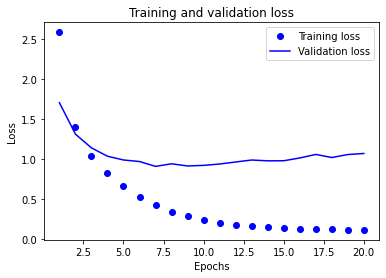

In [15]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

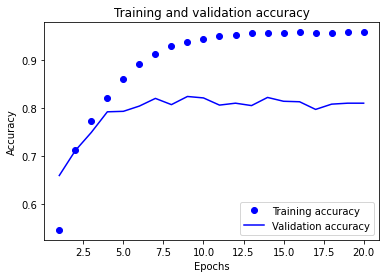

In [16]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [17]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 49ms/step - loss: 2.5827 - accuracy: 0.5560
Epoch 2/9
18/18 [==============================] - 1s 46ms/step - loss: 1.3450 - accuracy: 0.7194
Epoch 3/9
18/18 [==============================] - 1s 46ms/step - loss: 1.0003 - accuracy: 0.7853
Epoch 4/9
18/18 [==============================] - 1s 46ms/step - loss: 0.7831 - accuracy: 0.8331
Epoch 5/9
18/18 [==============================] - 1s 44ms/step - loss: 0.6155 - accuracy: 0.8684
Epoch 6/9
18/18 [==============================] - 1s 45ms/step - loss: 0.4922 - accuracy: 0.8979
Epoch 7/9
18/18 [==============================] - 1s 45ms/step - loss: 0.3913 - accuracy: 0.9151
Epoch 8/9
18/18 [==============================] - 1s 45ms/step - loss: 0.3217 - accuracy: 0.9313
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9588 - accuracy: 0.7939


In [18]:
results

[0.9588286280632019, 0.7938557267189026]

In [19]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1981300089047195

### Generating predictions on new data

In [20]:
predictions = model.predict(x_test)

In [21]:
predictions[0].shape

(46,)

In [22]:
np.sum(predictions[0])

1.0

In [23]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [24]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [25]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**A model with an information bottleneck**

In [26]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 23ms/step - loss: 3.0610 - accuracy: 0.2478 - val_loss: 2.3518 - val_accuracy: 0.5000
Epoch 2/20
63/63 [==============================] - 1s 20ms/step - loss: 1.9788 - accuracy: 0.5407 - val_loss: 1.7868 - val_accuracy: 0.5470
Epoch 3/20
63/63 [==============================] - 1s 18ms/step - loss: 1.6503 - accuracy: 0.5565 - val_loss: 1.6360 - val_accuracy: 0.5840
Epoch 4/20
63/63 [==============================] - 1s 18ms/step - loss: 1.4469 - accuracy: 0.5986 - val_loss: 1.5332 - val_accuracy: 0.5870
Epoch 5/20
63/63 [==============================] - 1s 19ms/step - loss: 1.3012 - accuracy: 0.6277 - val_loss: 1.4961 - val_accuracy: 0.6100
Epoch 6/20
63/63 [==============================] - 1s 19ms/step - loss: 1.1941 - accuracy: 0.6804 - val_loss: 1.4663 - val_accuracy: 0.6480
Epoch 7/20
63/63 [==============================] - 1s 18ms/step - loss: 1.1110 - accuracy: 0.7152 - val_loss: 1.4679 - val_accuracy: 0.6600
Epoch 8/20
63

### Further experiments

* Tente usar camadas maiores ou menores: 32 unidades, 128 unidades e assim por diante.

* Você usou duas camadas intermediárias antes da camada de classificação final do softmax. 

* Agora tente usando uma única camada intermediária ou três camadas intermediárias.

## Exercício
1. Defina e treine modelos com camadas maiores e menores: 32 unidades e 128 unidades. Como isso influenciou no resultado final dos modelos?

**Modelo com camada de 32 unidades**




In [27]:
model1 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [28]:
model1.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [29]:
history_model1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 48ms/step - loss: 3.0422 - accuracy: 0.5050 - val_loss: 2.3022 - val_accuracy: 0.6190
Epoch 2/20
16/16 [==============================] - 1s 37ms/step - loss: 1.8889 - accuracy: 0.6637 - val_loss: 1.7020 - val_accuracy: 0.6600
Epoch 3/20
16/16 [==============================] - 1s 38ms/step - loss: 1.4365 - accuracy: 0.7056 - val_loss: 1.4260 - val_accuracy: 0.7040
Epoch 4/20
16/16 [==============================] - 1s 39ms/step - loss: 1.1893 - accuracy: 0.7447 - val_loss: 1.2694 - val_accuracy: 0.7260
Epoch 5/20
16/16 [==============================] - 1s 39ms/step - loss: 1.0138 - accuracy: 0.7781 - val_loss: 1.1762 - val_accuracy: 0.7580
Epoch 6/20
16/16 [==============================] - 1s 36ms/step - loss: 0.8765 - accuracy: 0.8077 - val_loss: 1.1023 - val_accuracy: 0.7640
Epoch 7/20
16/16 [==============================] - 1s 36ms/step - loss: 0.7602 - accuracy: 0.8355 - val_loss: 1.0574 - val_accuracy: 0.7760
Epoch 8/20
16

**Modelo com 128 unidades**

In [30]:
model2 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [31]:
model2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [32]:
history_model2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 94ms/step - loss: 2.2870 - accuracy: 0.5669 - val_loss: 1.4101 - val_accuracy: 0.6780
Epoch 2/20
16/16 [==============================] - 1s 81ms/step - loss: 1.1237 - accuracy: 0.7587 - val_loss: 1.0970 - val_accuracy: 0.7630
Epoch 3/20
16/16 [==============================] - 1s 81ms/step - loss: 0.7851 - accuracy: 0.8335 - val_loss: 0.9565 - val_accuracy: 0.8070
Epoch 4/20
16/16 [==============================] - 1s 79ms/step - loss: 0.5555 - accuracy: 0.8856 - val_loss: 0.9777 - val_accuracy: 0.7810
Epoch 5/20
16/16 [==============================] - 1s 79ms/step - loss: 0.4162 - accuracy: 0.9097 - val_loss: 0.8588 - val_accuracy: 0.8180
Epoch 6/20
16/16 [==============================] - 1s 78ms/step - loss: 0.3179 - accuracy: 0.9300 - val_loss: 0.9686 - val_accuracy: 0.7860
Epoch 7/20
16/16 [==============================] - 1s 76ms/step - loss: 0.2465 - accuracy: 0.9437 - val_loss: 0.8807 - val_accuracy: 0.8280
Epoch 8/20
16

**Comparação de perdas dos modelos**

In [33]:
loss_model1 = history_model1.history["loss"]
val_loss_model1 = history_model1.history["val_loss"]
loss_model2 = history_model2.history["loss"]
val_loss_model2 = history_model2.history["val_loss"]
epochs = range(1, len(loss) + 1)

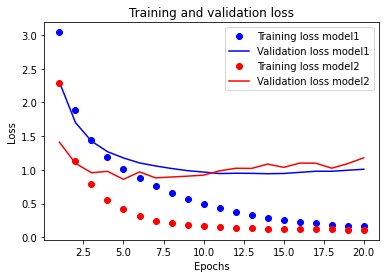

In [34]:

plt.plot(epochs, loss_model1, "bo", label="Training loss model1", color='b')
plt.plot(epochs, val_loss_model1, "b", label="Validation loss model1", color='b')
plt.plot(epochs, loss_model2, "bo", label="Training loss model2", color='r')
plt.plot(epochs, val_loss_model2, "b", label="Validation loss model2", color='r')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Como isso influenciou no resultado final dos modelos?**<br>
Para os **dados de treinamento** ter mais neurônios permitiu que os valores de perda fossem bem menores do que o modelo com poucos neurônios. Já para os **dados de validação**, o modelo 2 começa com uma perda menor, mas a partir da décima época ele começa a ter perdas um pouco maiores, no entanto, nunca chega a ultrapassar o maior valor de perda apresentado pelo modelo 1.



2. Utilize uma única camada intermediária com o melhor numero de unidades encontrado. Como isso influenciou no resultado final dos modelos?


**Modelo com 128 unidades e uma única camada intermediária**

In [35]:
model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [37]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [38]:
history_model = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 86ms/step - loss: 2.2078 - accuracy: 0.6077 - val_loss: 1.4373 - val_accuracy: 0.7050
Epoch 2/20
16/16 [==============================] - 1s 74ms/step - loss: 1.1251 - accuracy: 0.7756 - val_loss: 1.0914 - val_accuracy: 0.7740
Epoch 3/20
16/16 [==============================] - 1s 74ms/step - loss: 0.7744 - accuracy: 0.8473 - val_loss: 0.9434 - val_accuracy: 0.7980
Epoch 4/20
16/16 [==============================] - 1s 76ms/step - loss: 0.5692 - accuracy: 0.8910 - val_loss: 0.8651 - val_accuracy: 0.8260
Epoch 5/20
16/16 [==============================] - 1s 74ms/step - loss: 0.4315 - accuracy: 0.9154 - val_loss: 0.8181 - val_accuracy: 0.8230
Epoch 6/20
16/16 [==============================] - 1s 74ms/step - loss: 0.3371 - accuracy: 0.9301 - val_loss: 0.8071 - val_accuracy: 0.8280
Epoch 7/20
16/16 [==============================] - 1s 75ms/step - loss: 0.2692 - accuracy: 0.9406 - val_loss: 0.7926 - val_accuracy: 0.8360
Epoch 8/20
16

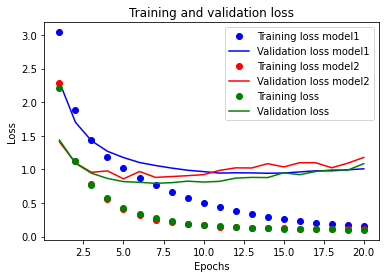

In [41]:
loss = history_model.history["loss"]
val_loss = history_model.history["val_loss"]
plt.plot(epochs, loss_model1, "bo", label="Training loss model1", color='b')
plt.plot(epochs, val_loss_model1, "b", label="Validation loss model1", color='b')
plt.plot(epochs, loss_model2, "bo", label="Training loss model2", color='r')
plt.plot(epochs, val_loss_model2, "b", label="Validation loss model2", color='r')
plt.plot(epochs, loss, "bo", label="Training loss", color='g')
plt.plot(epochs, val_loss, "b", label="Validation loss", color='g')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Como isso influenciou no resultado final dos modelos?**

O modelo com apenas um camda intermediária e com 128 neurônios apresenta uma perda menor do que os outros, tendo um melhor desempenho para os dados de treino e validação.

3. Utilize três camadas intermediárias com o melhor numero de unidades encontrado. Como isso influenciou no resultado final dos modelos?

**Modelo com 128 unidades de neurônios e 3 camadas intermediárias**

In [42]:
final_model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(46, activation="softmax")
])

final_model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
final_history = final_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 91ms/step - loss: 2.2393 - accuracy: 0.4920 - val_loss: 1.4382 - val_accuracy: 0.6730
Epoch 2/20
16/16 [==============================] - 1s 78ms/step - loss: 1.1956 - accuracy: 0.7318 - val_loss: 1.1695 - val_accuracy: 0.7300
Epoch 3/20
16/16 [==============================] - 1s 78ms/step - loss: 0.8590 - accuracy: 0.8056 - val_loss: 1.0168 - val_accuracy: 0.7830
Epoch 4/20
16/16 [==============================] - 1s 79ms/step - loss: 0.6311 - accuracy: 0.8607 - val_loss: 0.9469 - val_accuracy: 0.7990
Epoch 5/20
16/16 [==============================] - 1s 78ms/step - loss: 0.4447 - accuracy: 0.9043 - val_loss: 0.9566 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 1s 79ms/step - loss: 0.3587 - accuracy: 0.9172 - val_loss: 0.9148 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 1s 79ms/step - loss: 0.2526 - accuracy: 0.9431 - val_loss: 0.9881 - val_accuracy: 0.7940
Epoch 8/20
16

**Comparação dos modelos com 128 unidades:** uma camada intermediária **vs** três camadas intermediárias

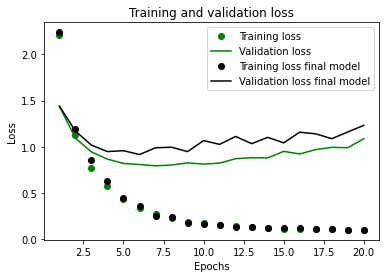

In [44]:
final_loss = final_history.history["loss"]
final_val_loss = final_history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training loss", color='g')
plt.plot(epochs, val_loss, "b", label="Validation loss", color='g')
plt.plot(epochs, final_loss, "bo", label="Training loss final model", color='black')
plt.plot(epochs, final_val_loss, "b", label="Validation loss final model", color='black')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Como isso influenciou no resultado final dos modelos?**<br>
Na validação o modelo com menos camadas apresenta um melhor comportamento. A quantidade de camadas influencia devido que podem ter tido valores perdidos na passagem das saídas de uma camada para outra.